# Optimizers

Optimizers are a key part of the algorithms that train neural networks. The original optimizer is gradient descent, and the concept of gradient descent is effectively the foundation of all optmizers (as well as fundamental to machine learning). Unlike activation functions, optimzers are a part of training the network, not a component of the network itself. In fact, the same optimizers that are used in Deep Neural Networks are used in a variety of other machine learning models as well.

Optimizers, and the parameters of optimizers, can have profound impacts on training. Similar to activation functions, there isn't a "one true optimizer". Different optimizers might perform better on different datasets or in different neural network architectures. Once again, empirical testing is a good way to suss out the effectiveness of an optimizer. 

In this lab we're going to explore several different optimizers in the context of two deep nerual network architectures and continue using the MNIST digits dataset. 

In [4]:
# Setting up MNST, this should look familiar:
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

mnist_num_classes = 10 
mnist_image_size = 784

(mnist_training_images, mnist_training_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_training_data = mnist_training_images.reshape(mnist_training_images.shape[0], mnist_image_size) 
mnist_test_data = mnist_test_images.reshape(mnist_test_images.shape[0], mnist_image_size)

mnist_training_labels = to_categorical(mnist_training_labels, mnist_num_classes)
mnist_test_labels = to_categorical(mnist_test_labels, mnist_num_classes)

Using TensorFlow backend.


In [9]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model, name, time):
    figure = plt.figure()
    figure.suptitle(name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(mnist_test_data, mnist_test_labels, verbose=False)
    print(f'Trained in {time} seconds')
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    


In [10]:
# Our first model
def fresh_model_1():
    model_1 = Sequential()
    model_1.add(Dense(units=256, activation='relu', input_shape=(mnist_image_size,)))
    model_1.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_1

# Our second model:
def fresh_model_2():
    model_2 = Sequential()
    model_2.add(Dense(units=64, activation='relu', input_shape=(mnist_image_size,)))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_2

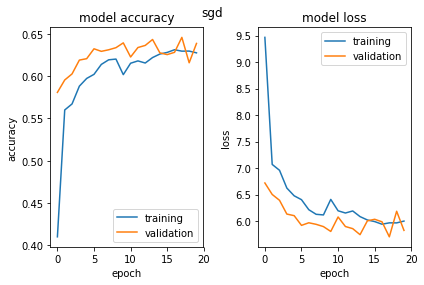

Trained in 76.51245999999992 seconds
Test loss: 5.95
Test accuracy: 0.631


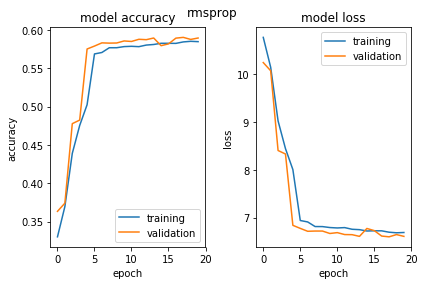

Trained in 95.3745530000001 seconds
Test loss: 6.66
Test accuracy: 0.587


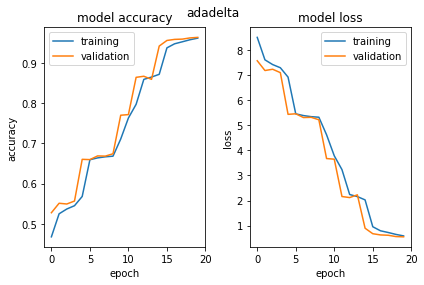

Trained in 125.02838400000019 seconds
Test loss: 0.696
Test accuracy: 0.953


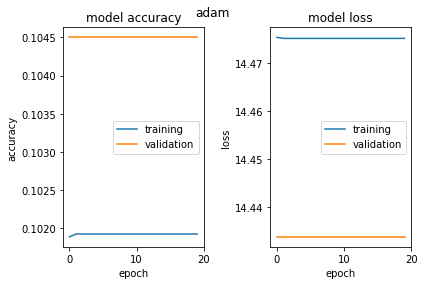

Trained in 116.79223899999988 seconds
Test loss: 14.5
Test accuracy: 0.101


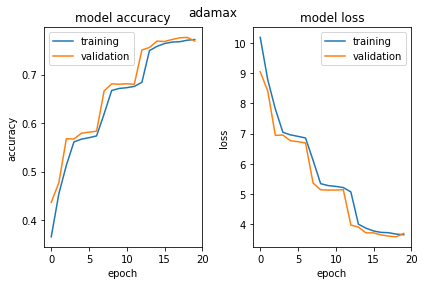

Trained in 115.96605 seconds
Test loss: 3.69
Test accuracy: 0.768


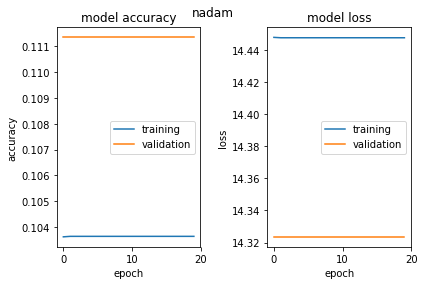

Trained in 134.81484900000032 seconds
Test loss: 14.5
Test accuracy: 0.103


In [17]:
import time # Because we care about the speed of these optimizers too!

optimizers = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

# So we can plot them on one chart
histories = []

for optimizer in optimizers:
    model = fresh_model_1()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

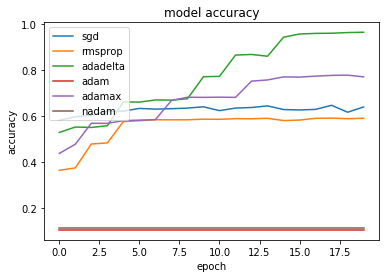

In [18]:
# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, histories):
    plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()

Note the dramatic differences between the validation accuracies! This is also a sign that this model is not excellent, otherwise more of the optimizers would work. 

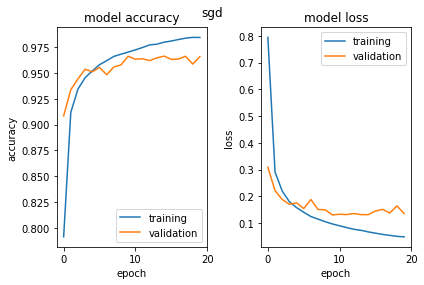

Trained in 45.68451399999958 seconds
Test loss: 0.16
Test accuracy: 0.961


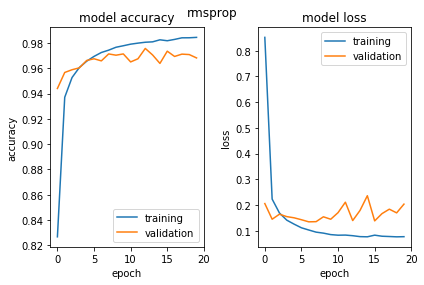

Trained in 51.923221999999896 seconds
Test loss: 0.229
Test accuracy: 0.966


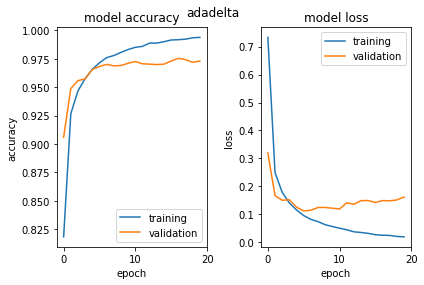

Trained in 61.228222999999616 seconds
Test loss: 0.177
Test accuracy: 0.971


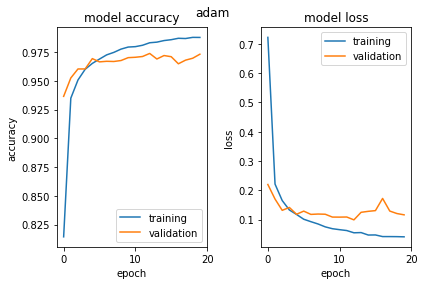

Trained in 58.440430000000106 seconds
Test loss: 0.137
Test accuracy: 0.968


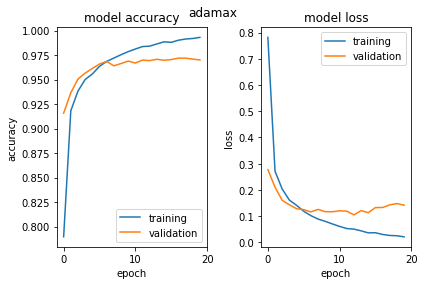

Trained in 56.286967000000004 seconds
Test loss: 0.155
Test accuracy: 0.968


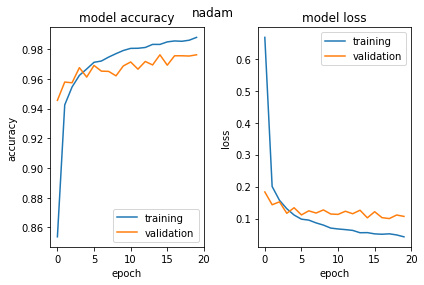

Trained in 63.398799000000054 seconds
Test loss: 0.109
Test accuracy: 0.975


In [19]:
histories = []

for optimizer in optimizers:
    model = fresh_model_2()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

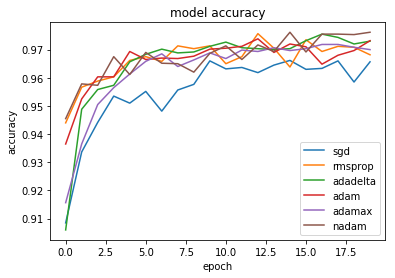

In [20]:
# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, histories):
    plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()

We can tell this model is much better, and all of the optimizers are able to achieve a 90%+ accuracy.